# Fraud Detection - Unbalanced Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE    # I am going to balance the dataset with the SMOTE technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data exploration

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There is no null data and all columns are numeric.

Normal: 99.83 % del dataset
Fraud: 0.17 % del dataset


Text(0.5, 1.0, 'Class distribution \n (0: Normal - 1: Fraud)')

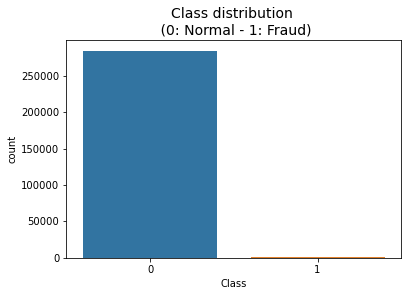

In [6]:
print('Normal:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% del dataset')
print('Fraud:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% del dataset')

sns.countplot('Class', data=df)
plt.title('Class distribution \n (0: Normal - 1: Fraud)', fontsize=14)

In [6]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
print(Fraud.shape, Normal.shape)

outlier_fraction = len(Fraud)/float(len(Normal))
print(outlier_fraction)

(492, 31) (284315, 31)
0.0017304750013189597


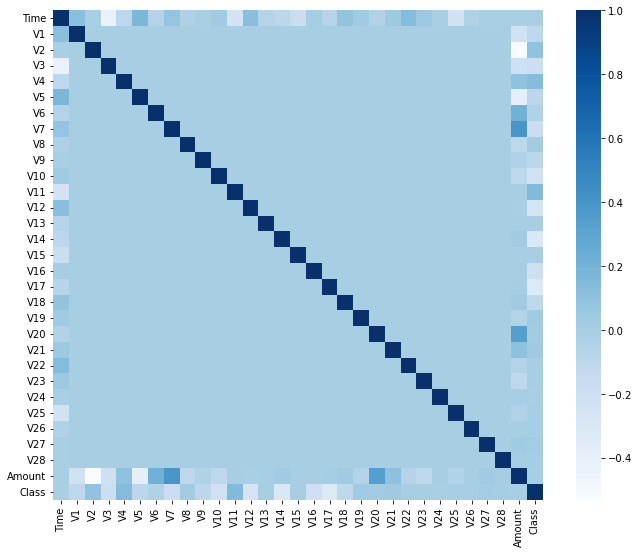

In [7]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, square = True, cmap="Blues")
plt.show()

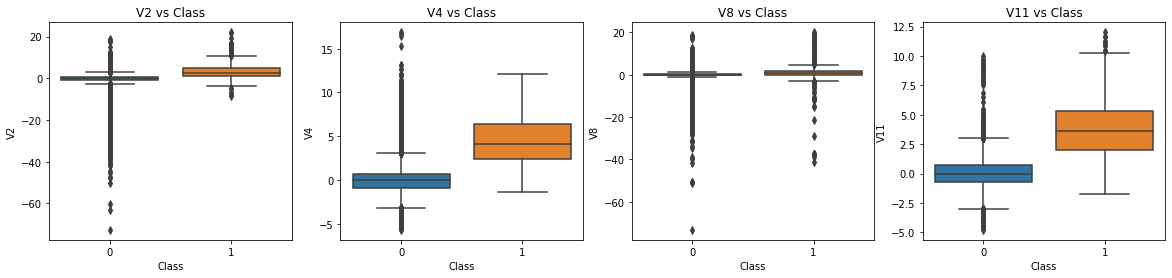

In [9]:
#I plot the features with the highest correlation to the target

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=df, ax=axes[0])
axes[0].set_title('V2 vs Class')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class')


sns.boxplot(x="Class", y="V8", data=df, ax=axes[2])
axes[2].set_title('V8 vs Class')


sns.boxplot(x="Class", y="V11", data=df, ax=axes[3])
axes[3].set_title('V11 vs Class')

plt.show()

## Pre-Processing

### Scaler

In [10]:
#I scale the "Amount" and "Time" columns

from sklearn.preprocessing import RobustScaler 

rob_scaler = RobustScaler()

df['Amount_scaled'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

amount_escalado = df['Amount_scaled']
time_escalado = df['Time_scaled']

df.drop(['Amount_scaled', 'Time_scaled'], axis=1, inplace=True)
df.insert(0, 'Amount_scaled', amount_escalado)
df.insert(1, 'Time_scaled', time_escalado)

df.head()

,Amount_scaled,Time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### PCA

In [11]:
# I separate features and target

columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = df[columns]
y = df[target]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [12]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X) 

X_pca.shape

(284807, 22)

0.9580305472481928


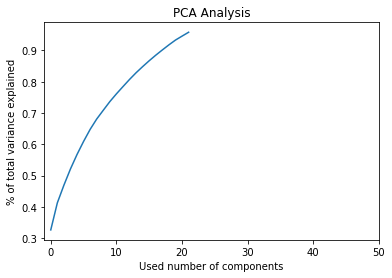

In [13]:
varianza_component = pca.explained_variance_ratio_
print(varianza_component.sum())

explained_variance = pca.explained_variance_ratio_.cumsum()

plt.ylabel('% of total variance explained')
plt.xlabel('Used number of components')
plt.title('PCA Analysis')
plt.plot(explained_variance)
plt.xlim(-1,50)
plt.style.context('seaborn-whitegrid')

In [14]:
df_pca=pd.DataFrame(X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.944740,1.379161,-1.832948,2.212350,1.067481,-0.302610,0.038880,-0.152115,0.392562,0.028951,...,1.049080,0.141075,1.545972,-0.181294,0.453856,-0.155897,-0.082940,-0.446263,0.063052,0.281161
1,-1.367745,-0.962232,-0.101754,0.486106,0.454457,0.072662,0.077009,-0.079627,-0.328135,0.139175,...,-0.638165,0.099343,0.683891,0.021304,-0.462590,0.063999,0.232950,0.151244,0.273301,-0.701065
2,4.502193,0.791201,-1.748772,1.648949,0.039610,-1.379320,0.388871,-0.445409,-1.214947,-0.834878,...,-0.711509,0.068966,2.365391,-0.386010,2.847890,-0.974808,0.021386,2.126281,-0.126428,1.021258
3,0.592194,0.976287,-1.441142,1.219526,-1.009596,-1.200573,0.234362,-0.414331,-1.281472,-0.495008,...,-0.537029,0.301518,-0.572503,-0.277078,1.041254,0.867593,-1.675805,1.362371,0.200615,-0.212776
4,-0.292395,1.392390,-0.578043,1.786169,0.138355,-0.084818,-0.416271,0.138962,1.091949,-0.450974,...,-1.466574,0.973630,0.374163,-0.344644,0.447349,0.186964,0.120770,-0.856950,0.110209,0.686641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-1.513712,13.118293,12.729572,-1.891664,-2.560495,6.132494,5.337117,-6.347330,2.446138,-2.401889,...,-0.158823,-5.723442,-1.004933,-3.325079,-1.238025,-1.867955,-0.301178,0.239163,0.080189,0.260832
284803,-0.941364,0.873384,-1.581944,0.583674,-0.696698,-1.507667,-0.135615,-0.240448,0.160245,1.107396,...,-1.358499,0.624800,1.087527,-0.254259,0.689095,-0.000282,1.162592,1.417527,-0.363626,1.188503
284804,-0.390918,-2.038174,2.024480,-3.025222,0.143429,-3.596802,1.045292,-0.666322,0.173203,0.675764,...,0.178484,0.403514,1.319810,-0.268638,-0.167769,-0.179984,-0.449417,0.567723,-0.269564,0.617243
284805,-1.161846,0.403045,-0.080619,0.719521,0.506181,-0.191513,0.888448,-0.535592,0.176029,0.493924,...,1.113595,-0.564968,1.819019,0.241265,0.588907,-0.181537,-1.517624,-2.826942,-0.383131,0.902770


In [15]:
df_final=pd.concat([df["Class"],df_pca], axis=1)
df_final=df_final.sample(frac=1, random_state=12)

df_final

,Class,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
214164,0,-0.835093,-2.413123,-0.860041,-0.799198,-1.891578,0.930149,2.460931,0.046452,-0.329487,...,-0.976819,0.874295,-0.444636,-0.139188,-0.344632,0.366573,-0.989100,0.095453,-0.042280,0.256672
10783,0,-0.009746,4.488108,9.496972,-1.776381,5.474720,7.489583,7.545724,-1.399267,-7.886340,...,3.826349,14.683269,-1.180840,-1.813112,9.766705,15.865112,7.258460,-2.618343,-1.275834,-0.200485
228456,0,0.631921,1.176244,-0.729073,1.556012,-0.255506,-0.911246,-0.536249,-0.371779,-0.433896,...,1.191696,-0.111504,-0.205840,0.113995,-0.692714,1.188057,-0.972179,0.609393,-0.343702,0.698672
253376,0,-1.360057,-1.914728,0.274820,-0.121928,1.044279,0.433807,0.782489,-0.063094,0.858026,...,0.486903,-0.279962,-0.008439,0.090339,-0.844009,1.366154,-0.962621,0.380278,-0.339760,0.755677
243213,0,-1.137886,1.265138,-0.531639,-0.424876,-2.361528,-2.227305,-0.105535,-0.665697,0.041559,...,-0.257550,0.251094,-0.473772,-0.306689,-0.280179,0.539471,1.081838,1.725375,-0.209058,0.775801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206083,0,-0.187265,-1.888756,0.366973,-0.209734,1.092137,0.058675,0.604339,-0.090007,0.691442,...,-0.276986,-0.203489,-0.263062,0.024915,-0.706394,1.153206,-0.280080,-0.018954,0.160615,-0.514219
36482,0,3.669971,-1.414916,-0.621917,-1.140887,-1.102568,-3.245922,2.908126,-0.813311,-0.016872,...,-0.070109,0.558417,-0.250095,-0.568572,-1.106141,-0.416008,1.137846,-1.388974,0.093327,-0.306205
40177,0,-1.302913,-0.888792,-0.775026,2.024713,2.350697,0.381765,0.716095,-0.037304,0.112799,...,-1.307612,0.563483,-0.293145,-0.151290,-0.563972,0.359326,0.517408,0.839221,0.096309,-0.090447
255366,0,-1.191134,-1.982640,1.256004,-1.130091,0.855901,0.805080,-0.393403,0.198594,0.589632,...,0.437153,1.101082,-0.283742,0.003797,0.271049,-1.134926,0.003774,0.287219,-0.146091,0.472465


This final dataset contains the 22 main variables that explain 95% of the variance and the target "Class".

## Modeling

We will use a simple model like Decision Tree and a complex one like RandomForest. Then we will compare them.

In [16]:
# I separate features and target
columns = df_final.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = df_final[columns]
y = df_final[target]

print(X.shape)
print(y.shape)

(284807, 22)
(284807,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

### Decision Tree

In [19]:
dt= DecisionTreeClassifier(random_state=12)

In [20]:
dt_scores = cross_val_score(dt ,x_train_res, y_train_res, cv=10, scoring="roc_auc")

print(dt_scores)
print("Validation mean ROC_AUC:", dt_scores.mean())

[0.99861512 0.99846122 0.99826335 0.99848318 0.9983293  0.99841723
 0.99835129 0.99819741 0.99843922 0.99839525]
Validation mean ROC_AUC: 0.9983952575990113


In [21]:
dt.fit(x_train_res, y_train_res)

DecisionTreeClassifier(random_state=12)

In [22]:
y_pred_dt=dt.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred_dt)

array([[56739,   125],
       [   19,    79]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.81      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
print("ROC_AUC test:", roc_auc_score(y_test, y_pred_dt))
print("Accuracy test:", accuracy_score(y_test, y_pred_dt))

ROC_AUC test: 0.9019621108150632
Accuracy test: 0.997471998876444


### Random Forest

In [26]:
rdf= RandomForestClassifier(random_state=12)

In [27]:
rdf_scores = cross_val_score(rdf ,x_train_res, y_train_res, cv=10, scoring="roc_auc")

print(rdf_scores)
print("Validation mean ROC_AUC:", rdf_scores.mean())

[0.99999992 0.99999999 0.99999864 0.99999997 0.99999982 0.99999706
 0.9999996  0.99999945 0.99997461 1.        ]
Validation mean ROC_AUC: 0.9999969055839546


In [28]:
rdf.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=12)

In [29]:
y_pred_rdf=rdf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred_rdf)

array([[56849,    15],
       [   14,    84]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred_rdf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
print("ROC_AUC test:", roc_auc_score(y_test, y_pred_rdf))
print("Accuracy test:", accuracy_score(y_test, y_pred_rdf))

ROC_AUC test: 0.9284395349304606
Accuracy test: 0.9994908886626171


## Conclusion

As can be seen, the Random Forest model performs a little better in terms of ROC_AUC. This means that it generates fewer False negatives and False positives.

<AxesSubplot:title={'center':'MODEL COMPARISON'}, ylabel='ROC_AUC'>

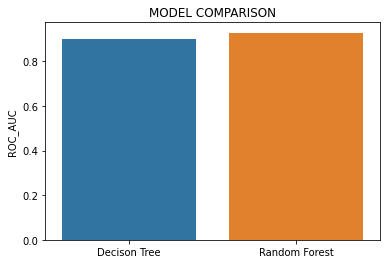

In [34]:
model=["Decison Tree","Random Forest"]
ROC_AUC=[roc_auc_score(y_test, y_pred_dt),roc_auc_score(y_test, y_pred_rdf)]
                                                        
plt.title('MODEL COMPARISON')
plt.ylabel('ROC_AUC')

sns.barplot(model, ROC_AUC)